<center><h1>Intelligence Artificielle Avancée</h1></center>
<center><h2>TP11</h2></center>

# Importation des librairies

In [1]:
!pip install transformers
!pip install torch
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00


In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# importation du tokenizer et du modèle GPT2

In [4]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

# Créer la fonction générant du texte à l'aide du modèle

In [10]:
def generate_text(prompt, max_lenght = 50):
  input_ids = tokenizer.encode(prompt, return_tensors='pt')
  output = model.generate(input_ids, max_length=max_lenght, num_return_sequences=1)
  generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
  return generated_text

# Génération du texte

In [11]:
prompt_text = 'Once upon a time'
generated_text = generate_text(prompt_text, max_lenght = 100)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great


# Analyse du texte généré

In [14]:
def generate_abd_analyze_text(prompt, max_length=50):
  input_ids = tokenizer.encode(prompt, return_tensors='pt')
  output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)
  generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

  words = generated_text.split()
  word_freq = {}
  for word in words:
    if word in word_freq:
      word_freq[word] += 1
    else: word_freq[word] = 1

  plt.figure(figsize=(10, 6))
  plt.bar(word_freq.keys(), word_freq.values())
  plt.xlabel('Mots générés')
  plt.ylabel('Fréquence')
  plt.title('Distribution des mots générés')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  return generated_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


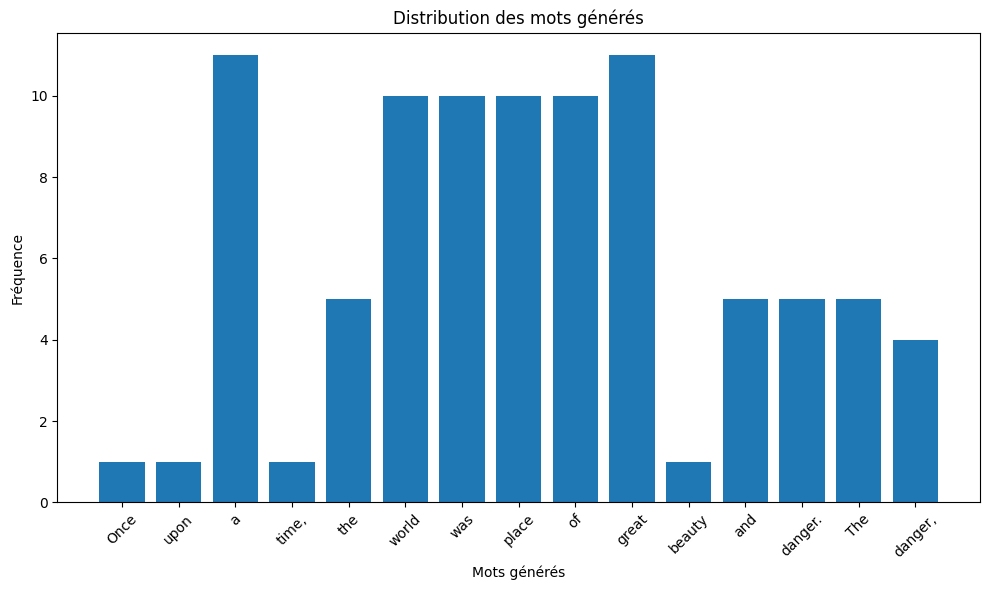

Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great


In [16]:
prompt_text = "Once upon a time"
generated_text = generate_abd_analyze_text(prompt_text, max_length = 100)
print(generated_text)